# Assignment 2 - Classification
**Group D - Members:**
1. Venkateshprasad Kulkarni
2. Reena Sajad Hyder
3. Pravinkumar Yadav
4. Milad Ghavami

As part of the assignment, we had to perform three tasks:
1. **Summary**: Perform `EDA` and share `insights` you learned, focusing on any differences between the two time periods of concern.
2. **Preprocessing**: a. Standardize the numerical features and encode the categorical features. b. Identify and remove up to 1% of rows as outliers based on standardized `dti`, `annual_income`, and `delinq_2yrs` variables.
3. **Classification**: Split the data into `Train-Validate-Test` sets. Build a `logistic model, two KNN models, and two SGDClassifier models`. Compare the accuracy of all final models and discuss which model you would recommend.

# TASK 1: SUMMARY

## 1. Importing required libraies and creating a logger for the code

### i. Importing libraries

In [26]:
!pip install textblob

import logging
import datetime
import pandas as pd
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import io
import numpy as np
import seaborn as sns
from textblob import TextBlob
from bs4 import BeautifulSoup
import pandas as pd
import re

### ii. Creating a logger to generate logs for the entire code

In [27]:
# Configure the logging
logging.basicConfig(
    level=logging.DEBUG,
    format='%(asctime)s - %(levelname)s - %(message)s',
    datefmt='%Y-%m-%d %H:%M:%S'
)

# Create a logger
logger = logging.getLogger(__name__)
logging.getLogger('matplotlib').setLevel(logging.WARNING)

## 2. Loading the CSV data file in a dataframe

In [28]:
start_time = datetime.datetime.now()
# Import data from csv file:
input_data = pd.read_csv('data/lc_14to16_sample.csv')
stop_time = datetime.datetime.now()
logger.info(f"Time taken to load the csv file: {stop_time - start_time}")
rows, columns = input_data.shape
logger.info(f"The Dataframe has {rows} rows and {columns} columns.")

2024-10-11 12:40:44 - INFO - Time taken to load the csv file: 0:00:05.797452
2024-10-11 12:40:44 - INFO - The Dataframe has 100000 rows and 151 columns.


## 3. Data Cleaning
### i. Transforming the dataframe to keep the necessary/required columns for further processing.

### ii. Checking if any of the numerical attributes have string or text data

In [29]:
start_time = datetime.datetime.now()
# Selecting the necessary columns from the dataframe
required_columns = ['loan_amnt',
                    'grade',
                    'emp_title',
                    'emp_length',
                    'home_ownership',
                    'annual_inc',
                    'verification_status',
                    'issue_d',
                    'dti',
                    'delinq_2yrs',
                    'mths_since_last_delinq',
                    'pub_rec',
                    'open_acc',
                    'total_acc',
                    'application_type',
                    'annual_inc_joint',
                    'dti_joint',
                    'verification_status_joint',
                    'acc_now_delinq',
                    'tot_coll_amt',
                    'tot_cur_bal',
                    'total_bal_il',
                    'il_util',
                    'max_bal_bc',
                    'total_rev_hi_lim',
                    'bc_util', 'all_util',
                    'chargeoff_within_12_mths',
                    'delinq_amnt',
                    'mort_acc',
                    'pct_tl_nvr_dlq',
                    'pub_rec_bankruptcies',
                    'tax_liens',
                    'revol_bal',
                    'revol_util',
                    'fico_range_low',
                    'fico_range_high',
                    'loan_status']
input_data = input_data[required_columns]
modified_rows, modified_columns = input_data.shape
logger.info(f"The modified Dataframe has {modified_rows} rows and {modified_columns} columns.")
stop_time = datetime.datetime.now()
logger.info(f"Time taken to process the block: {stop_time - start_time}")

2024-10-11 12:40:44 - INFO - The modified Dataframe has 100000 rows and 38 columns.
2024-10-11 12:40:44 - INFO - Time taken to process the block: 0:00:00.125122


In [30]:
start_time = datetime.datetime.now()
# Convert the specified columns to numeric, coerce errors to NaN
numerical_columns = ['loan_amnt', 'annual_inc', 'dti', 'delinq_2yrs', 'mths_since_last_delinq', 'pub_rec', 'open_acc', 'total_acc',
                 'annual_inc_joint', 'dti_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_bal_il', 'il_util',
                 'max_bal_bc', 'total_rev_hi_lim', 'bc_util', 'all_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mort_acc',
                 'pct_tl_nvr_dlq', 'pub_rec_bankruptcies', 'tax_liens', 'revol_bal', 'revol_util', 'fico_range_low', 'fico_range_high']

# Function to check if values are non-numeric or empty cell
def count_non_numeric_values(series):
    return series.apply(pd.to_numeric, errors='coerce').isna().sum()

# Apply the function to each column and get the count of non-numeric rows per column
non_numeric_counts = input_data[numerical_columns].apply(count_non_numeric_values)

logger.info("Number of rows with non-numeric values for each column:")
logger.info(non_numeric_counts)
stop_time = datetime.datetime.now()
logger.info(f"Time taken to process the block: {stop_time - start_time}")

2024-10-11 12:41:19 - INFO - Number of rows with non-numeric values for each column:
2024-10-11 12:41:19 - INFO - loan_amnt                       0
annual_inc                      0
dti                             6
delinq_2yrs                     0
mths_since_last_delinq      48230
pub_rec                         0
open_acc                        0
total_acc                       0
annual_inc_joint            99132
dti_joint                   99132
acc_now_delinq                  0
tot_coll_amt                    0
tot_cur_bal                     0
total_bal_il                58266
il_util                     63812
max_bal_bc                  58266
total_rev_hi_lim                0
bc_util                      1069
all_util                    58269
chargeoff_within_12_mths        0
delinq_amnt                     0
mort_acc                        0
pct_tl_nvr_dlq                  0
pub_rec_bankruptcies            0
tax_liens                       0
revol_bal                       0
re

### iii. Cleaning non-numerical attributes

In [31]:
start_time = datetime.datetime.now()
text_columns = ['grade', 'emp_length', 'emp_title', 'home_ownership', 'verification_status', 'application_type', 'verification_status_joint', 'loan_status']

# Combine employment length into 3 categories:
## '< 1 year', '1 year' = 0-1 years
## '2 years, 3 years, 4 years =  2-4 years
## everything else =  5+ years
input_data["emp_length"] = input_data["emp_length"].replace(['< 1 year', '1 year'], '0-1 years')
input_data["emp_length"] = input_data["emp_length"].replace(['2 years', '3 years', '4 years', '5 years'], '2-5 years')
input_data["emp_length"] = input_data["emp_length"].replace([ '6 years', '7 years', '8 years', '9 years', '10+ years'], '5+ years')

# Remove "ANY" category data for home_ownership
input_data = input_data[input_data.home_ownership != "ANY"]
stop_time = datetime.datetime.now()
logger.info(f"Time taken to process the block: {stop_time - start_time}")
print(input_data['emp_length'].unique())

2024-10-11 12:41:20 - INFO - Time taken to process the block: 0:00:00.203624


['2-5 years' '5+ years' '0-1 years' nan]


## 4. Descriptive Statistics

Calculating summary statistics for numerical features such as `loan_amnt`, `annual_inc`, `dti`, `total_acc`, `acc_now_delinq`, `fico_range_low`, and `fico_range_high`. Understand the central tendency, dispersion, and distribution of these variables.

### i. Removing null values from the required numerical features

In [32]:
start_time = datetime.datetime.now()
# List of numerical features to analyze
numerical_features = ['loan_amnt', 'annual_inc', 'dti', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal','total_rev_hi_lim','delinq_amnt', 'delinq_2yrs']
#['loan_amnt', 'annual_inc', 'dti', 'total_acc', 'acc_now_delinq', 'fico_range_low', 'fico_range_high']

# Convert columns to numeric, invalid parsing will be set as NaN
input_data[numerical_features] = input_data[numerical_features].apply(pd.to_numeric, errors='coerce')

# Drop rows that have NaN in any of the specified columns (i.e., non-numeric values)
input_data_non_null = input_data.dropna(subset=numerical_features)

# Verify that all specified columns are numerical
logger.debug(input_data_non_null[numerical_features].dtypes)

logger.info("Column: " + input_data_non_null.columns)
stop_time = datetime.datetime.now()
logger.info(f"Time taken to process the block: {stop_time - start_time}")

2024-10-11 12:41:20 - DEBUG - loan_amnt           float64
annual_inc          float64
dti                 float64
acc_now_delinq      float64
tot_coll_amt        float64
tot_cur_bal         float64
total_rev_hi_lim    float64
delinq_amnt         float64
delinq_2yrs         float64
dtype: object
2024-10-11 12:41:20 - INFO - Index(['Column: loan_amnt', 'Column: grade', 'Column: emp_title',
       'Column: emp_length', 'Column: home_ownership', 'Column: annual_inc',
       'Column: verification_status', 'Column: issue_d', 'Column: dti',
       'Column: delinq_2yrs', 'Column: mths_since_last_delinq',
       'Column: pub_rec', 'Column: open_acc', 'Column: total_acc',
       'Column: application_type', 'Column: annual_inc_joint',
       'Column: dti_joint', 'Column: verification_status_joint',
       'Column: acc_now_delinq', 'Column: tot_coll_amt', 'Column: tot_cur_bal',
       'Column: total_bal_il', 'Column: il_util', 'Column: max_bal_bc',
       'Column: total_rev_hi_lim', 'Column: bc_ut

### ii. Calculating the summary statistics for the required numerical values

In [33]:
start_time = datetime.datetime.now()
def display_summary_statistics(dataframe, numerical_features):
    # Calculate summary statistics
    summary_statistics = dataframe[numerical_features].describe()

    # Display the summary statistics
    logger.info("Summary Statistics:")
    logger.info(summary_statistics)

display_summary_statistics(input_data_non_null, numerical_features)
stop_time = datetime.datetime.now()
logger.info(f"Time taken to process the block: {stop_time - start_time}")

2024-10-11 12:41:20 - INFO - Summary Statistics:
2024-10-11 12:41:20 - INFO -           loan_amnt    annual_inc           dti  acc_now_delinq  \
count  99981.000000  9.998100e+04  99981.000000    99981.000000   
mean   14949.319121  7.744184e+04     18.791850        0.006351   
std     8722.274985  6.918837e+04      9.953855        0.098141   
min     1000.000000  1.000000e+03      0.000000        0.000000   
25%     8000.000000  4.680000e+04     12.310000        0.000000   
50%    13000.000000  6.500000e+04     18.230000        0.000000   
75%    20000.000000  9.200000e+04     24.770000        0.000000   
max    40000.000000  8.500021e+06    999.000000       14.000000   

        tot_coll_amt   tot_cur_bal  total_rev_hi_lim   delinq_amnt  \
count   99981.000000  9.998100e+04      9.998100e+04  99981.000000   
mean      252.999520  1.409176e+05      3.302999e+04     13.266101   
std      1917.996541  1.573214e+05      3.360534e+04    725.919288   
min         0.000000  0.000000e+00    

### iii. Calculating the values variance, skewness, kurtosis for understanding the central tendency, dispersion

In [34]:
start_time = datetime.datetime.now()
# Calculate variance
variance = input_data_non_null[numerical_features].var()
logger.info("\nVariance Values:")
logger.info(variance)

# Calculate skewness
skewness = input_data_non_null[numerical_features].skew()
logger.info("\nSkewness Values:")
logger.info(skewness)

# Calculate kurtosis
kurtosis = input_data_non_null[numerical_features].kurt()
logger.info("\nKurtosis Values:")
logger.info(kurtosis)
stop_time = datetime.datetime.now()
logger.info(f"Time taken to process the block: {stop_time - start_time}")

2024-10-11 12:41:20 - INFO - 
Variance Values:
2024-10-11 12:41:20 - INFO - loan_amnt           7.607808e+07
annual_inc          4.787031e+09
dti                 9.907923e+01
acc_now_delinq      9.631596e-03
tot_coll_amt        3.678711e+06
tot_cur_bal         2.475002e+10
total_rev_hi_lim    1.129319e+09
delinq_amnt         5.269588e+05
delinq_2yrs         8.497696e-01
dtype: float64
2024-10-11 12:41:20 - INFO - 
Skewness Values:
2024-10-11 12:41:20 - INFO - loan_amnt            0.697210
annual_inc          39.226970
dti                 21.501653
acc_now_delinq      42.142250
tot_coll_amt        32.093745
tot_cur_bal          3.024495
total_rev_hi_lim     5.577008
delinq_amnt         81.052609
delinq_2yrs          5.154597
dtype: float64
2024-10-11 12:41:20 - INFO - 
Kurtosis Values:
2024-10-11 12:41:20 - INFO - loan_amnt             -0.262514
annual_inc          3709.983964
dti                 1977.253979
acc_now_delinq      4472.739731
tot_coll_amt        2340.496054
tot_cur_bal    

## 5. Distribution Analysis

Plot histograms or density plots for key numerical features like `loan_amnt`, `annual_inc`, and `dti`. Analyze the distribution of these features to identify any skewness or outliers.

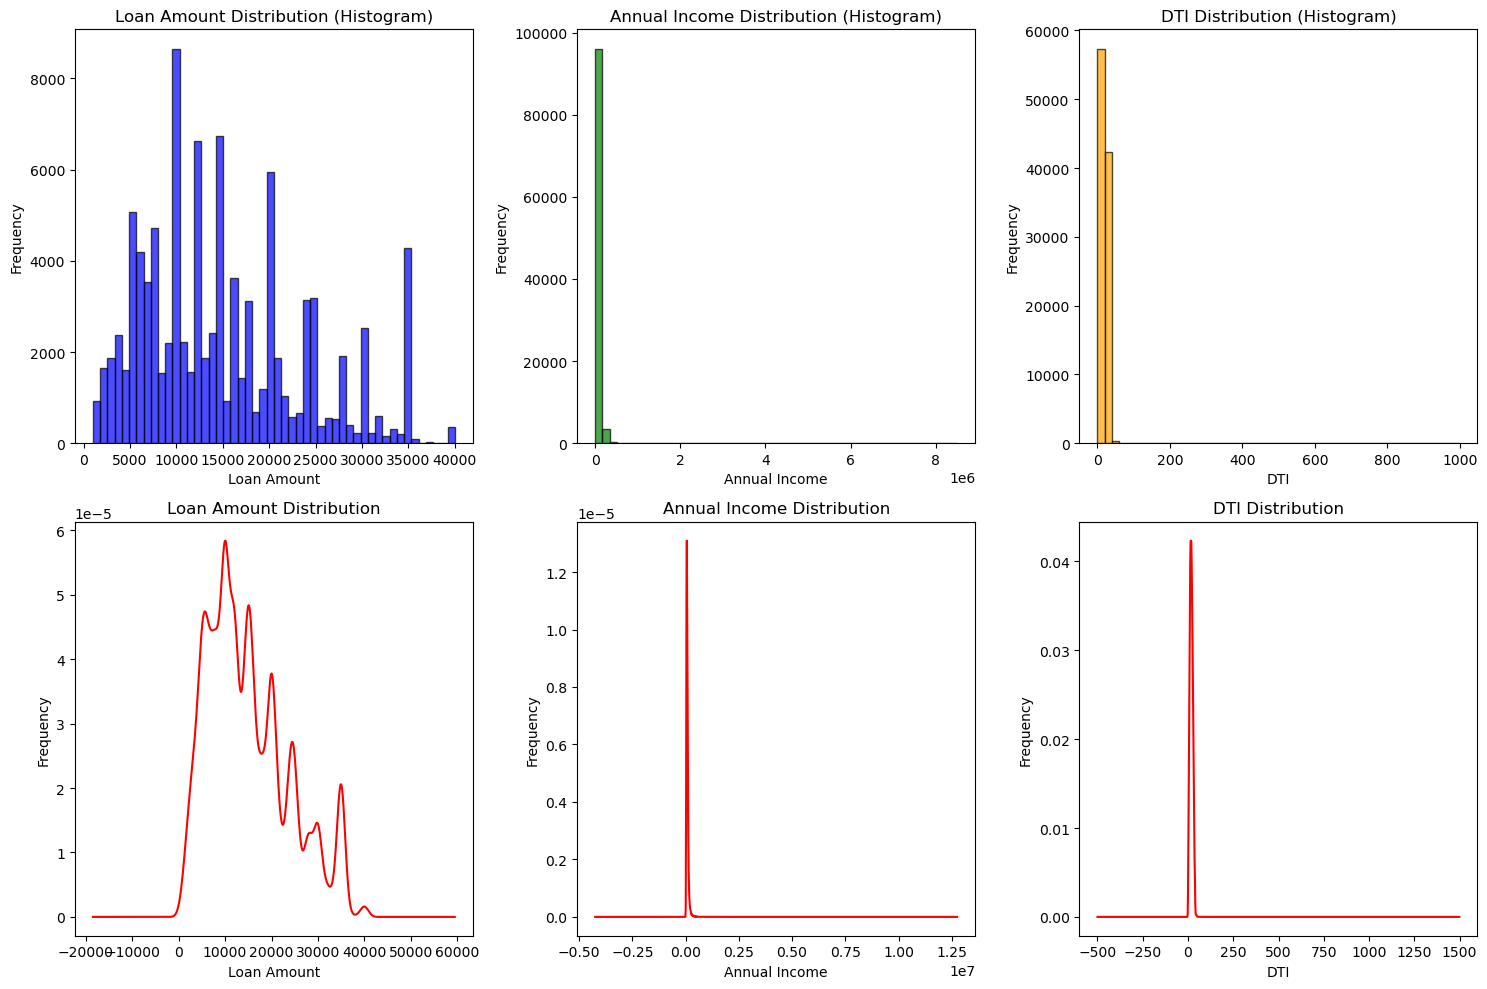

2024-10-11 12:42:13 - INFO - Time taken to process the block: 0:00:52.285325


In [35]:
start_time = datetime.datetime.now()
def plot_numerical_distributions(dataframe):
    plt.figure(figsize=(15, 10))

    # Loan amount histogram
    plt.subplot(2, 3, 1)
    plt.hist(dataframe['loan_amnt'], bins=50, color='blue', edgecolor='black', alpha=0.7)
    plt.title('Loan Amount Distribution (Histogram)')
    plt.xlabel('Loan Amount')
    plt.ylabel('Frequency')

    # Loan amount density plot
    plt.subplot(2, 3, 4)
    dataframe['loan_amnt'].plot(kind='kde', color='red')
    plt.title('Loan Amount Distribution')
    plt.xlabel('Loan Amount')
    plt.ylabel('Frequency')

    # Annual Income histogram
    plt.subplot(2, 3, 2)
    plt.hist(dataframe['annual_inc'], bins=50, color='green', edgecolor='black', alpha=0.7)
    plt.title('Annual Income Distribution (Histogram)')
    plt.xlabel('Annual Income')
    plt.ylabel('Frequency')

    # Annual Income density plot
    plt.subplot(2, 3, 5)
    dataframe['annual_inc'].plot(kind='kde', color='red')
    plt.title('Annual Income Distribution')
    plt.xlabel('Annual Income')
    plt.ylabel('Frequency')

    # DTI histogram
    plt.subplot(2, 3, 3)
    plt.hist(dataframe['dti'].dropna(), bins=50, color='orange', edgecolor='black', alpha=0.7)
    plt.title('DTI Distribution (Histogram)')
    plt.xlabel('DTI')
    plt.ylabel('Frequency')

    # DTI` density plot
    plt.subplot(2, 3, 6)
    dataframe['dti'].dropna().plot(kind='kde', color='red')
    plt.title('DTI Distribution')
    plt.xlabel('DTI')
    plt.ylabel('Frequency')

    # Show the plot
    plt.tight_layout()
    plt.show()

plot_numerical_distributions(input_data_non_null)
stop_time = datetime.datetime.now()
logger.info(f"Time taken to process the block: {stop_time - start_time}")

## 6. Correlation Analysis

Create a correlation matrix to explore relationships between numerical variables such as 'loan_amnt', 'annual_inc', 'dti', 'total_acc', 'acc_now_delinq', 'fico_range_low', 'fico_range_high'. Identify any strong correlations that might be useful for predictive modeling or further investigation.

Plotting correlation matrix and heatmap for the above specified attributes

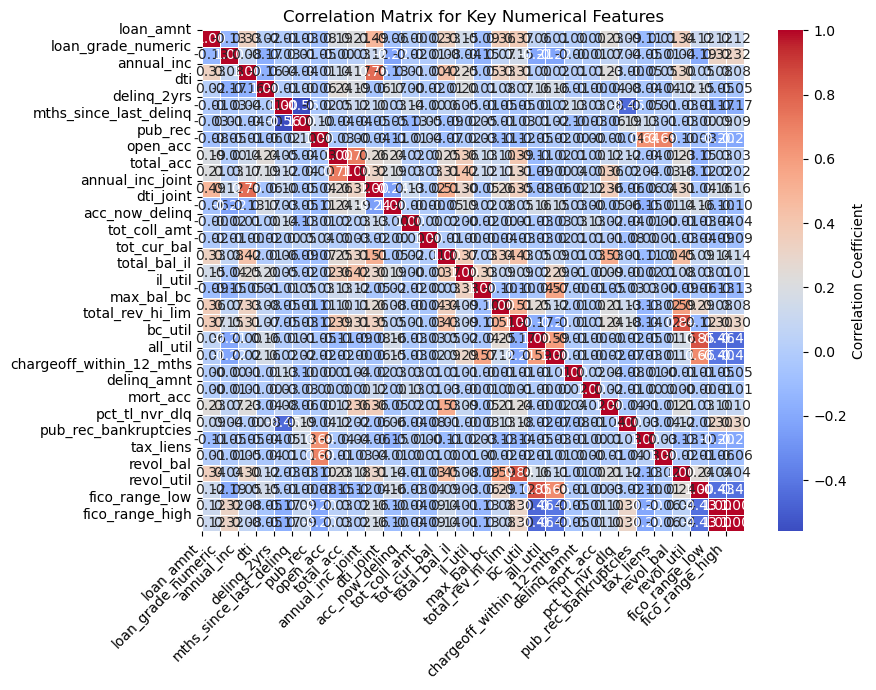

2024-10-11 12:42:22 - INFO - Time taken to process the block: 0:00:09.265534


In [36]:
start_time = datetime.datetime.now()
# Converting grade to numeric for correlation
grade_map = {'A':3, 'B':3, 'C':2, 'D':1, 'E':1, 'F':1, 'G':1}
input_data['loan_grade_numeric'] = input_data['grade'].map(grade_map)


#List of columns
correlation_columns = ['loan_amnt', 'loan_grade_numeric','annual_inc', 'dti', 'delinq_2yrs', 'mths_since_last_delinq', 'pub_rec', 'open_acc', 'total_acc',
                 'annual_inc_joint', 'dti_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_bal_il', 'il_util',
                 'max_bal_bc', 'total_rev_hi_lim', 'bc_util', 'all_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mort_acc',
                 'pct_tl_nvr_dlq', 'pub_rec_bankruptcies', 'tax_liens', 'revol_bal', 'revol_util', 'fico_range_low', 'fico_range_high']

# Convert columns to numeric, invalid parsing will be set as NaN
correlation_data = input_data[correlation_columns].apply(pd.to_numeric, errors='coerce')
correlation_data.head()
# Creating the correlation matrix
correlation_matrix = correlation_data.corr()

# Plotting the correlation matrix using a heatmap with annotations
plt.figure(figsize=(9, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5, cbar_kws={'label': 'Correlation Coefficient'})

# Formatting the heatmap
plt.xticks(range(len(correlation_columns)), correlation_columns, rotation=45, ha='right')
plt.yticks(range(len(correlation_columns)), correlation_columns)
plt.title('Correlation Matrix for Key Numerical Features')

# Show the plot
plt.tight_layout()
plt.show()

# Displaying the correlation matrix
correlation_matrix
stop_time = datetime.datetime.now()
logger.info(f"Time taken to process the block: {stop_time - start_time}")

In [37]:
start_time = datetime.datetime.now()
# Selecting relevant columns for KNN model
# Set the correlation threshold
correlation_threshold = 0.1

# Get the correlation values for 'loan_grade_numeric'
correlation_with_grade = correlation_matrix['loan_grade_numeric']

# Select columns with correlation greater than 0.2
selected_columns_knn = correlation_with_grade[correlation_with_grade.abs() > correlation_threshold].index.tolist()

# Remove 'loan_grade_numeric' from the list of selected columns if it's included
if 'loan_grade_numeric' in selected_columns_knn:
    selected_columns_knn.remove('loan_grade_numeric')

# Display the selected columns
logger.info(f"Columns with a correlation greater than {correlation_threshold} with 'loan_grade_numeric':")
logger.info(selected_columns_knn)
stop_time = datetime.datetime.now()
logger.info(f"Time taken to process the block: {stop_time - start_time}")

2024-10-11 12:42:22 - INFO - Columns with a correlation greater than 0.1 with 'loan_grade_numeric':
2024-10-11 12:42:22 - INFO - ['loan_amnt', 'dti', 'annual_inc_joint', 'dti_joint', 'il_util', 'total_rev_hi_lim', 'bc_util', 'all_util', 'revol_util', 'fico_range_low', 'fico_range_high']
2024-10-11 12:42:22 - INFO - Time taken to process the block: 0:00:00.015616


## 7. Analyzing Loan Count and Grade relationship

Analyzing the relationship of approved loan amount and grade to understand if there is any discrepancy in the dataset years.

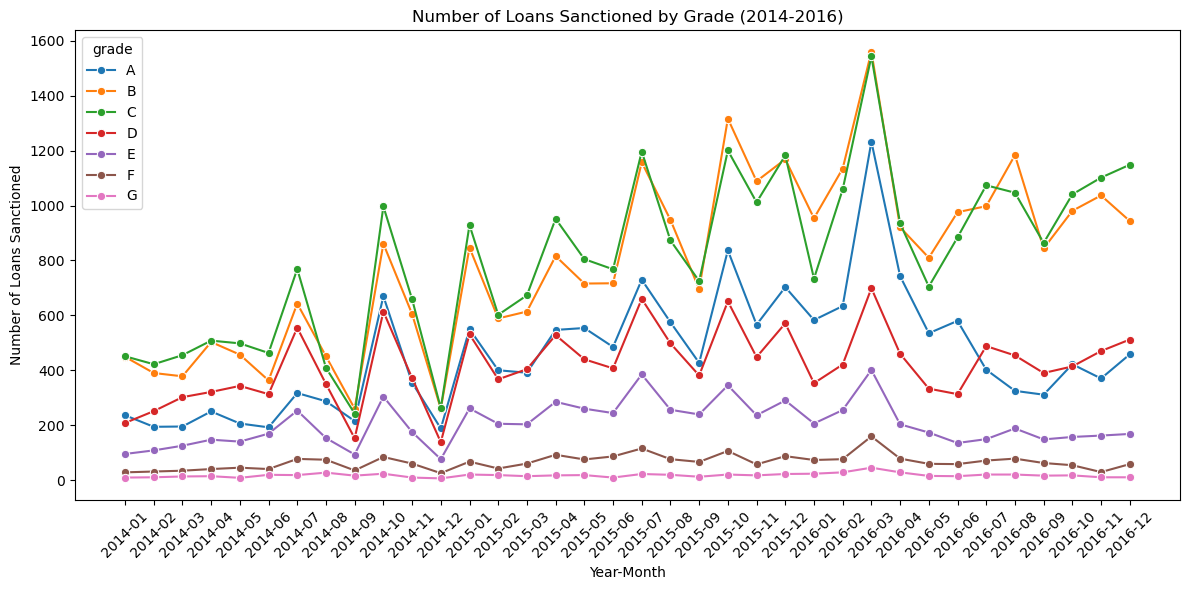

2024-10-11 12:42:25 - INFO - Time taken to process the block: 0:00:02.816556


In [38]:
start_time = datetime.datetime.now()
# Convert loan issue date to datetime
input_data['issue_d'] = pd.to_datetime(input_data['issue_d'])

# Create 'year' column for easy filtering
input_data['year'] = input_data['issue_d'].dt.year

# Filter data to only include years 2014, 2015, and 2016
yearly_filtered_input_data = input_data[input_data['year'].isin([2014, 2015, 2016])]

# Create 'year_month' column to represent both year and month in one column
yearly_filtered_input_data['year_month'] = yearly_filtered_input_data['issue_d'].dt.to_period('M').astype(str)

# Group by 'year_month' and 'grade', count the number of loans sanctioned
grouped = yearly_filtered_input_data.groupby(['year_month', 'grade']).size().reset_index(name='loan_count')

# Sort by year_month for better visualization
grouped = grouped.sort_values(by='year_month')

# Plot combined data
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped, x='year_month', y='loan_count', hue='grade', marker='o')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)
plt.title('Number of Loans Sanctioned by Grade (2014-2016)')
plt.xlabel('Year-Month')
plt.ylabel('Number of Loans Sanctioned')
plt.tight_layout()
plt.show()

stop_time = datetime.datetime.now()
logger.info(f"Time taken to process the block: {stop_time - start_time}")

## 8. Analyzing relationship between Grade, Employee Title and Verification Status
Analyze if the loan is approved for a person who income source is not verified.

0


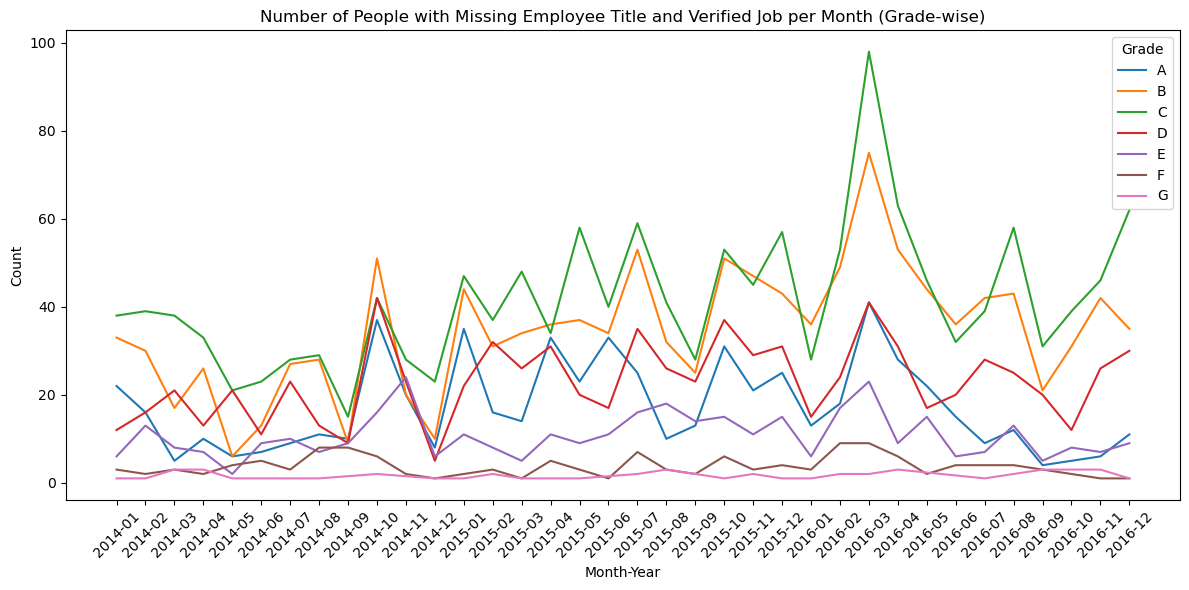

2024-10-11 12:42:27 - INFO - Time taken to process the block: 0:00:02.156305


In [39]:
start_time = datetime.datetime.now()

# Filter for missing employee titles and verified/source verified status, and make a copy to avoid the warning
filtered_emp_data = input_data[(input_data['emp_title'].isna()) & 
                               (input_data['verification_status'].isin(['Verified', 'Source Verified']))].copy()

# Now you can safely modify the 'year_month' column without triggering the warning
filtered_emp_data['year_month'] = filtered_emp_data['issue_d'].dt.to_period('M').astype(str)

# Check for missing grades
print(filtered_emp_data['grade'].isna().sum())

# Group by 'year_month' and 'grade', then count occurrences
result = filtered_emp_data.groupby(['year_month', 'grade']).size().reset_index(name='count')

# Sort the result for better readability
result = result.sort_values(by=['year_month'])

# Create a line plot to visualize the results
plt.figure(figsize=(12, 6))

# Using seaborn's lineplot to visualize the count per month per grade
sns.lineplot(x='year_month', y='count', hue='grade', data=result)

# Customize the plot
plt.title('Number of People with Missing Employee Title and Verified Job per Month (Grade-wise)')
plt.xlabel('Month-Year')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate month-year for better readability
plt.legend(title='Grade')
plt.tight_layout()

# Show plot
plt.show()

stop_time = datetime.datetime.now()
logger.info(f"Time taken to process the block: {stop_time - start_time}")

## 9. Analysis/Description of "Task 1: Summary":
In the graph showing loans from 2014 to 2016, we notice that in 2014, LendingClub issued more loans to lower grades (C, D, and E) compared to higher grades, especially Grade A. This suggests that during this period, the company was approving a higher number of loans for riskier borrowers.

This is significant in light of the 2015 LendingClub controversy, where the company faced scrutiny for a lack of transparency in its lending practices. The trend of lending more to individuals with lower credit grades—who are more likely to default—indicates that LendingClub may have been taking greater risks to boost profits. While riskier loans can lead to higher returns, they also come with a higher likelihood of non-repayment.

Interestingly, the second graph reveals a peculiar trend: an increase in loans where job titles were missing, yet the data still marked the job as verified. This spike, particularly noticeable in 2015 and 2016, raises concerns about proper verification procedures. It seems that after the controversy became public, LendingClub might have started approving more loans without adequate verification, potentially as a way to keep the company afloat during challenging times. While this observation may not be directly tied to the core of the controversy, it appears to be a side effect of the company's attempt to continue operations amidst scrutiny.

Together, these patterns suggest that LendingClub not only took on riskier borrowers but also may have relaxed its verification processes, both of which contributed to its challenges during and after the 2015 controversy.

# TASK 2: PRE PROCESSING

## 1. Standardizing the numerical values 

In [40]:
start = datetime.datetime.now()

rows, columns = input_data.shape
logger.info(f"Before: The Dataframe has {rows} rows and {columns} columns.")

# List of numerical features to standardize
numerical_columns = ['loan_amnt', 'annual_inc', 'dti', 'delinq_2yrs', 'mths_since_last_delinq', 'pub_rec', 'open_acc', 'total_acc',
                 'annual_inc_joint', 'dti_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_bal_il', 'il_util',
                 'max_bal_bc', 'total_rev_hi_lim', 'bc_util', 'all_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mort_acc',
                 'pct_tl_nvr_dlq', 'pub_rec_bankruptcies', 'tax_liens', 'revol_bal', 'revol_util', 'fico_range_low', 'fico_range_high']

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the numerical features in the dataframe
input_data[numerical_columns] = scaler.fit_transform(input_data[numerical_columns])

rows, columns = input_data.shape
logger.info(f"After: The Dataframe has {rows} rows and {columns} columns.")

# Display the first few rows to check the results
input_data[numerical_columns].head()
stop_time = datetime.datetime.now()
logger.info(f"Time taken to process the block: {stop_time - start_time}")
logger.debug(input_data.isnull().sum())

2024-10-11 12:42:27 - INFO - Before: The Dataframe has 99987 rows and 40 columns.
2024-10-11 12:42:28 - INFO - After: The Dataframe has 99987 rows and 40 columns.
2024-10-11 12:42:28 - INFO - Time taken to process the block: 0:00:02.781780
2024-10-11 12:42:28 - DEBUG - loan_amnt                        0
grade                            0
emp_title                     5898
emp_length                    5771
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
dti                              6
delinq_2yrs                      0
mths_since_last_delinq       48222
pub_rec                          0
open_acc                         0
total_acc                        0
application_type                 0
annual_inc_joint             99119
dti_joint                    99119
verification_status_joint    99119
acc_now_delinq                   0
tot_coll_amt                     0
tot_cur_bal                   

## 2. Encoding the categorical features and converting grade to value

In [41]:
start = datetime.datetime.now()
print(input_data['emp_length'].unique())
print(input_data['home_ownership'].unique())
print(input_data['verification_status'].unique())
print(input_data['application_type'].unique())
print(input_data['verification_status_joint'].unique())
# List of columns to apply one-hot encoding
text_columns = ['emp_length', 'home_ownership', 'verification_status', 'application_type', 'verification_status_joint']
#text_columns = ['emp_length', 'home_ownership', 'verification_status', 'application_type', 'verification_status_joint', 'loan_status']

# Perform one-hot encoding on the specified text columns
input_data = pd.get_dummies(input_data, columns=text_columns, drop_first=False)

rows, columns = input_data.shape
logger.info(f"Before: The Dataframe has {rows} rows and {columns} columns.")

#input_data['numeric_date'] = input_data['issue_d'].astype('int64')
# input_data = input_data.drop('issue_d', axis=1)

# Display the first few rows of the encoded dataframe
logger.info(input_data.head())

stop_time = datetime.datetime.now()
logger.info(f"Time taken to process the block: {stop_time - start_time}")
print(input_data.columns)

['2-5 years' '5+ years' '0-1 years' nan]
['MORTGAGE' 'OWN' 'RENT']
['Source Verified' 'Verified' 'Not Verified']
['Joint App' 'Individual']
['Not Verified' nan]


2024-10-11 12:42:29 - INFO - Before: The Dataframe has 99987 rows and 47 columns.
2024-10-11 12:42:29 - INFO -    loan_amnt grade                        emp_title  annual_inc    issue_d  \
0   1.725570     E                     Investigator   -0.562769 2015-11-01   
1   0.235108     C                      eng.drafter   -0.439917 2015-10-01   
2   0.005806     C                warehouse manager   -0.107492 2014-07-01   
3  -1.312680     B                      Fabricator    -0.468823 2016-03-01   
4  -0.487193     C  Logistics Management Specialist    0.037041 2016-05-01   

        dti  delinq_2yrs  mths_since_last_delinq   pub_rec  open_acc  ...  \
0  3.025793     1.790320               -0.717558 -0.378699  2.891928  ...   
1  1.097887    -0.379338                     NaN  1.217833 -0.149056  ...   
2 -0.164947    -0.379338                1.112910 -0.378699 -0.327938  ...   
3  0.680961    -0.379338                     NaN -0.378699 -0.327938  ...   
4  1.150128     1.790320           

Index(['loan_amnt', 'grade', 'emp_title', 'annual_inc', 'issue_d', 'dti',
       'delinq_2yrs', 'mths_since_last_delinq', 'pub_rec', 'open_acc',
       'total_acc', 'annual_inc_joint', 'dti_joint', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_bal_il', 'il_util', 'max_bal_bc',
       'total_rev_hi_lim', 'bc_util', 'all_util', 'chargeoff_within_12_mths',
       'delinq_amnt', 'mort_acc', 'pct_tl_nvr_dlq', 'pub_rec_bankruptcies',
       'tax_liens', 'revol_bal', 'revol_util', 'fico_range_low',
       'fico_range_high', 'loan_status', 'loan_grade_numeric', 'year',
       'emp_length_0-1 years', 'emp_length_2-5 years', 'emp_length_5+ years',
       'home_ownership_MORTGAGE', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_Individual', 'application_type_Joint App',
       'verification_status_joint_Not Verified'],
      dtype='object

## 3. Detecting and removing outliers using IQR

In [37]:
start = datetime.datetime.now()

# List of numerical columns to be standardized for outlier detection
numerical_outlier_columns = ['dti', 'annual_inc', 'delinq_2yrs']

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the selected columns
input_data[numerical_outlier_columns] = scaler.fit_transform(input_data[numerical_outlier_columns])

# Add up the standardized values of the selected columns
input_data['outlier_score'] = input_data[numerical_outlier_columns].sum(axis=1)

# IQR method to detect outliers
Q1 = input_data['outlier_score'].quantile(0.25)
Q3 = input_data['outlier_score'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers (1.5 * IQR rule)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify rows that are outliers
outliers = input_data[(input_data['outlier_score'] < lower_bound) | (input_data['outlier_score'] > upper_bound)]

# Limit removal to 1% of the total rows (if there are more outliers)
outliers_to_remove = outliers.nlargest(int(0.01 * len(input_data)), 'outlier_score')

# Remove outliers from the original dataframe
input_data_cleaned = input_data.drop(outliers_to_remove.index)

# Drop the temporary 'outlier_score' column from the cleaned data
input_data_cleaned = input_data_cleaned.drop(columns=['outlier_score'])

# Display the cleaned dataframe and how many rows were removed
logger.info(f"Removed {len(outliers_to_remove)} rows as outliers.")
logger.info(input_data_cleaned.head())

stop_time = datetime.datetime.now()
logger.info(f"Time taken to process the block: {stop_time - start_time}")

2024-10-10 15:47:17 - INFO - Removed 999 rows as outliers.
2024-10-10 15:47:17 - INFO -    loan_amnt grade                        emp_title  annual_inc    issue_d  \
0   1.725570     E                     Investigator   -0.562769 2015-11-01   
1   0.235108     C                      eng.drafter   -0.439917 2015-10-01   
2   0.005806     C                warehouse manager   -0.107492 2014-07-01   
3  -1.312680     B                      Fabricator    -0.468823 2016-03-01   
4  -0.487193     C  Logistics Management Specialist    0.037041 2016-05-01   

        dti  delinq_2yrs  mths_since_last_delinq   pub_rec  open_acc  ...  \
0  3.025793     1.790320               -0.717558 -0.378699  2.891928  ...   
1  1.097887    -0.379338                     NaN  1.217833 -0.149056  ...   
2 -0.164947    -0.379338                1.112910 -0.378699 -0.327938  ...   
3  0.680961    -0.379338                     NaN -0.378699 -0.327938  ...   
4  1.150128     1.790320               -1.266699  1.217833

## 4. Imputing values to deal with missing values

In [38]:
# Separate numeric and categorical columns
numeric_cols = input_data_cleaned.select_dtypes(include=['number']).columns
categorical_cols = input_data_cleaned.select_dtypes(exclude=['number']).columns

# Fill missing values: mean for numeric, mode for categorical
input_data_imputed = input_data_cleaned.copy()

# Fill numeric columns with mean
input_data_imputed[numeric_cols] = input_data_cleaned[numeric_cols].apply(lambda col: col.fillna(col.mean()), axis=0)

# Fill categorical columns with mode
input_data_imputed[categorical_cols] = input_data_cleaned[categorical_cols].apply(lambda col: col.fillna(col.mode()[0]), axis=0)

# Keeping a copy of imputed data
input_data_imputed_copy = input_data_imputed.copy()

## 5. Converting grade to a tertiary variable: A,B = High, DEFG = Low,C = Medium

In [39]:
start = datetime.datetime.now()
# Convert grade to tertiary variable
input_data_imputed['grade_tertiary'] = input_data_imputed['grade'].replace(['A', 'B'], '3.High').replace(['C'], '2.Medium').replace(['D', 'E', 'F', 'G'], '1.Low')
input_data_imputed['grade_tertiary'].value_counts()

# filter out Medium for the grade_tertiary column 
input_data_imputed_high_low = input_data_imputed[input_data_imputed['grade_tertiary'] != '2.Medium']

logger.info(input_data_imputed['grade_tertiary'].value_counts())

logger.info(input_data_imputed_high_low['grade_tertiary'].value_counts())
stop_time = datetime.datetime.now()
logger.info(f"Time taken to process the block: {stop_time - start_time}")

2024-10-10 15:47:17 - INFO - grade_tertiary
3.High      44936
2.Medium    28858
1.Low       25194
Name: count, dtype: int64
2024-10-10 15:47:17 - INFO - grade_tertiary
3.High    44936
1.Low     25194
Name: count, dtype: int64
2024-10-10 15:47:17 - INFO - Time taken to process the block: 0:00:01.452718


# TASK 3: CLASSIFICATION

## LOGISTIC REGRESSION MODEL

Validation Accuracy: 1.0000

Validation Classification Report:
              precision    recall  f1-score   support

       1.Low       1.00      1.00      1.00      2538
      3.High       1.00      1.00      1.00      4475

    accuracy                           1.00      7013
   macro avg       1.00      1.00      1.00      7013
weighted avg       1.00      1.00      1.00      7013



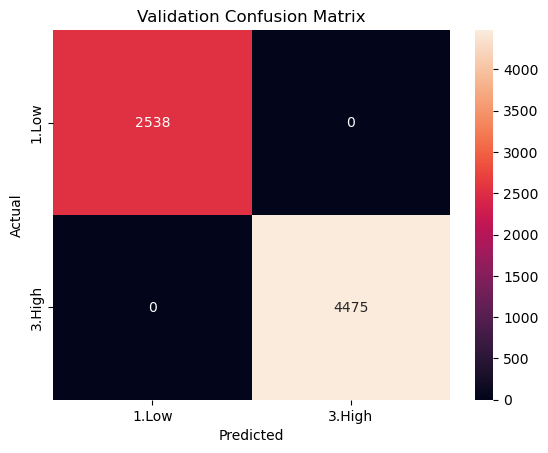

Test Accuracy: 1.0000

Test Classification Report:
              precision    recall  f1-score   support

       1.Low       1.00      1.00      1.00      2546
      3.High       1.00      1.00      1.00      4467

    accuracy                           1.00      7013
   macro avg       1.00      1.00      1.00      7013
weighted avg       1.00      1.00      1.00      7013



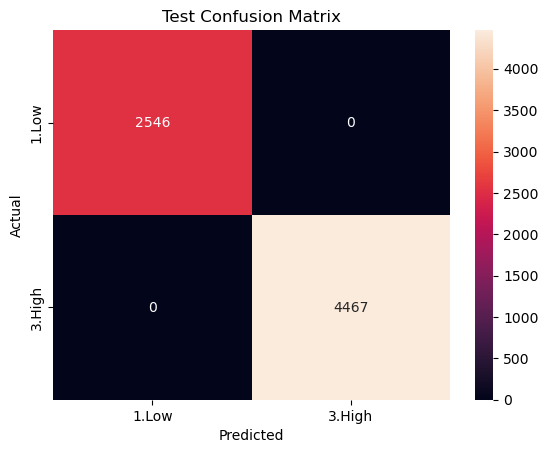

2024-10-10 16:10:53 - INFO - Time taken to process the block: 0:23:37.239269


Class Labels: ['1.Low' '3.High']


In [41]:
start = datetime.datetime.now()
input_data_imputed_high_low_1 = input_data_imputed_high_low.copy()
input_data_imputed_high_low_1['issue_d'] = input_data_imputed_high_low_1['issue_d'].astype(object)
# Step 1: Prepare the features (X) and target (y)
# Drop 'grade' and keep all other columns except 'grade_tertiary' for predictors
X = input_data_imputed_high_low_1.drop(columns=['grade_tertiary', 'grade'])
y = input_data_imputed_high_low_1['grade_tertiary']

# Step 2: Convert categorical variables into dummy/indicator variables (if applicable)
X = pd.get_dummies(X, drop_first=True)

# Step 3: Split the data into training (80%) and temporary (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Split the temporary set into validation (10%) and test (10%) sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 5: Instantiate and fit the logistic regression model
logit = LogisticRegression(max_iter=1000)
logit.fit(X_train, y_train)

# Step 6: Make predictions for validation and test sets
y_val_pred = logit.predict(X_val)
y_test_pred = logit.predict(X_test)

# Step 7: Evaluate the model's accuracy on validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Step 8: Classification report for validation set
print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Step 9: Confusion matrix for validation set
val_cm = confusion_matrix(y_val, y_val_pred)

# Step 10: Plot a labeled confusion matrix for validation set
sns.heatmap(val_cm, annot=True, fmt='d', xticklabels=['1.Low', '3.High'], yticklabels=['1.Low', '3.High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Validation Confusion Matrix')
plt.show()

# Step 11: Evaluate the model's accuracy on test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Step 12: Classification report for test set
print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))

# Step 13: Confusion matrix for test set
test_cm = confusion_matrix(y_test, y_test_pred)

# Step 14: Plot a labeled confusion matrix for test set
sns.heatmap(test_cm, annot=True, fmt='d', xticklabels=['1.Low', '3.High'], yticklabels=['1.Low', '3.High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Test Confusion Matrix')
plt.show()

# Step 15: Print class labels
print("Class Labels:", logit.classes_)
stop_time = datetime.datetime.now()
logger.info(f"Time taken to process the block: {stop_time - start_time}")

### Adding predicted probability

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# ---------------------------------------------------
# Add predicted probability to the dataframe
# ---------------------------------------------------

# Predict on the full feature set
input_data_imputed_high_low_1['predicted'] = logit.predict(X)
input_data_imputed_high_low_1['predicted_prob'] = logit.predict_proba(X)[:, 1]

# Display the updated dataframe with predictions
print(input_data_imputed_high_low_1.head())

# ---------------------------------------------------
# ROC curve
# ---------------------------------------------------

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, logit.predict_proba(X_test)[:, 1], pos_label='3.High')
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### Setting Threshold to 0.6

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------------------------------
# Predictions with threshold of 0.6
# ---------------------------------------------------

# Get predicted probabilities and apply threshold
y_pred_06 = (logit.predict_proba(X_test)[:, 1] > 0.6).astype(int)

# Convert predicted labels back to original label types
y_pred_06 = np.where(y_pred_06 == 1, '3.High', '1.Low')

# Print classification report
print("Classification Report for Threshold 0.6:")
print(classification_report(y_test, y_pred_06))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_06)

# Plot a labeled confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=['1.Low', '3.High'], yticklabels=['1.Low', '3.High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix at Threshold 0.6')
plt.show()

# ---------------------------------------------------
# ROC curve
# ---------------------------------------------------

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, logit.predict_proba(X_test)[:, 1], pos_label='3.High')
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


### Setting threshold to 0.5

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------------------------------
# Predictions with threshold of 0.5
# ---------------------------------------------------

# Get predicted probabilities and apply threshold
y_pred_05 = (logit.predict_proba(X_test)[:, 1] > 0.5).astype(int)

# Convert predicted labels back to original label types
y_pred_05 = np.where(y_pred_05 == 1, '3.High', '1.Low')

# Print classification report
print("Classification Report for Threshold 0.5:")
print(classification_report(y_test, y_pred_05))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_05)

# Plot a labeled confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=['1.Low', '3.High'], yticklabels=['1.Low', '3.High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix at Threshold 0.5')
plt.show()

# ---------------------------------------------------
# ROC curve
# ---------------------------------------------------

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, logit.predict_proba(X_test)[:, 1], pos_label='3.High')
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


### Hyper parameter tuning using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------------------------------
# Hyperparameter tuning for Logistic Regression
# ---------------------------------------------------

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l2'],                    # Regularization type
    'solver': ['lbfgs'],                  # Solver (lbfgs is suitable for small datasets)
    'max_iter': [100, 200]                # Maximum number of iterations
}

# Initialize the Logistic Regression model
log_model = LogisticRegression()

# Set up GridSearchCV
grid_search = GridSearchCV(log_model, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator (tuned model)
best_model = grid_search.best_estimator_

# Step 1: Predict probabilities for the validation set using the tuned model
y_val_proba_best = best_model.predict_proba(X_val)
y_val_proba_high_best = y_val_proba_best[:, best_model.classes_ == "3.High"].flatten()

# Step 2: Adjust the threshold to 0.6
threshold = 0.6
y_val_pred_adjusted_best = ["3.High" if prob > threshold else "1.Low" for prob in y_val_proba_high_best]

# Step 3: Confusion Matrix
cm_adjusted_best = confusion_matrix(y_val, y_val_pred_adjusted_best, labels=["1.Low", "3.High"])

# Classification Report
print("Classification Report with Adjusted Threshold (0.6) after Hyperparameter Tuning:")
print(classification_report(y_val, y_val_pred_adjusted_best, labels=["1.Low", "3.High"]))

# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm_adjusted_best, annot=True, fmt="d", cmap="Blues", xticklabels=["1.Low", "3.High"], yticklabels=["1.Low", "3.High"])
plt.title("Confusion Matrix with Threshold = 0.6 (Tuned Model)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Step 4: Plot ROC Curve for the tuned model
fpr_best, tpr_best, thresholds_best = roc_curve(y_val, y_val_proba_high_best, pos_label="3.High")
roc_auc_best = auc(fpr_best, tpr_best)

plt.figure(figsize=(8, 6))
plt.plot(fpr_best, tpr_best, color='blue', label=f"ROC curve (area = {roc_auc_best:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve (Tuned Model)')
plt.legend(loc="lower right")
plt.show()

print(f"AUC Score (Tuned Model): {roc_auc_best:.4f}")

## KNN Model - High Low

In [ ]:


# ---------------------------------------------------
# Preparing the data
# ---------------------------------------------------
X = input_data_imputed_high_low[selected_columns]  
Y = input_data_imputed_high_low['grade_tertiary'] 

# Handle missing values by filling with the mean
X = X.fillna(X.mean())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------------------------------------------------
# Initialize KNN model with k=19, Euclidean distance (p=2), and distance-based weights
# ---------------------------------------------------
knn = KNeighborsClassifier(n_neighbors=19, weights='uniform', p=2)

# Fit the KNN model to the training data
knn.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test_scaled)

# ---------------------------------------------------
# Plot confusion matrix as a heatmap
# ---------------------------------------------------
plt.figure(figsize=(6, 4))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=['Predicted Low', 'Predicted Medium', 'Predicted High'], 
            yticklabels=['Actual Low', 'Actual Medium', 'Actual High'])  # Adjusted labels for 'high_medium_low'
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

# ---------------------------------------------------
# Print classification report and confusion matrix
# ---------------------------------------------------
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ---------------------------------------------------
# Print model accuracy
# ---------------------------------------------------
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


## KNN Model - High Medium Low

In [ ]:


# ---------------------------------------------------
# Preparing the data
# ---------------------------------------------------
X = input_data_imputed[selected_columns]  
Y = input_data_imputed['grade_tertiary'] 

# Handle missing values by filling with the mean
X = X.fillna(X.mean())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------------------------------------------------
# Initialize KNN model with k=19, Euclidean distance (p=2), and distance-based weights
# ---------------------------------------------------
knn = KNeighborsClassifier(n_neighbors=19, weights='uniform', p=2)

# Fit the KNN model to the training data
knn.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test_scaled)

# ---------------------------------------------------
# Plot confusion matrix as a heatmap
# ---------------------------------------------------
plt.figure(figsize=(6, 4))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=['Predicted Low', 'Predicted Medium', 'Predicted High'], 
            yticklabels=['Actual Low', 'Actual Medium', 'Actual High'])  # Adjusted labels for 'high_medium_low'
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

# ---------------------------------------------------
# Print classification report and confusion matrix
# ---------------------------------------------------
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ---------------------------------------------------
# Print model accuracy
# ---------------------------------------------------
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


## SGDClassifier Model - High Low

In [ ]:
start = datetime.datetime.now()
from imblearn.over_sampling import SMOTE
rows, columns = input_data_imputed_high_low.shape
logger.info(f"The Dataframe has {rows} rows and {columns} columns.")
# Drop the emp_title column as it is not required anymore
columns_to_select = ['loan_amnt','grade','annual_inc','dti','delinq_2yrs','acc_now_delinq','tot_coll_amt',
                     'tot_cur_bal','total_rev_hi_lim','emp_length_2-5 years','emp_length_5+ years',
                     'home_ownership_OWN','home_ownership_RENT','grade_tertiary']

input_data_selected = input_data_imputed_high_low.filter(items=columns_to_select)

X = input_data_selected.drop(columns=['grade_tertiary', 'grade'])
y = input_data_selected['grade_tertiary']

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

from collections import Counter
logger.info(f"Original class distribution: {Counter(y)}")
logger.info(f"Resampled class distribution: {Counter(y_res)}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Train the model with hyperparameter tuning
sgd = SGDClassifier(loss='log_loss', class_weight='balanced', max_iter=2000, tol=1e-3)
sgd.fit(X_train, y_train)

# Make predictions
y_pred = sgd.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Classification report with zero_division parameter to handle undefined metrics
print(classification_report(y_test, y_pred, zero_division=0))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with heatmap
sns.heatmap(cm, annot=True, fmt="d", xticklabels=['1.Low', '3.High'], yticklabels=['1.Low', '3.High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ---------------------------------------------------
# Hyperparameter tuning for SGD
# ---------------------------------------------------

param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': [0.001, 0.01, 0.1, 1],  # Add valid eta0 values
    'max_iter': [1000, 1500, 2000]   # Increasing max_iter for convergence
}

sgd = SGDClassifier(loss='log_loss', class_weight='balanced')
sgd_cv = GridSearchCV(sgd, param_grid, cv=5, scoring='f1_weighted', error_score='raise')  # Use 'raise' to debug errors
sgd_cv.fit(X_train, y_train)

# Best parameters and score
print(sgd_cv.best_params_)
print(f'Best cross-validated score: {sgd_cv.best_score_}')

# Predict and evaluate
y_pred = sgd_cv.best_estimator_.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Classification report
print(classification_report(y_test, y_pred, zero_division=0))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=['1.Low', '3.High'], yticklabels=['1.Low', '3.High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
stop_time = datetime.datetime.now()
logger.info(f"Time taken to process the block: {stop_time - start_time}")

## SGDClassifier Model - High Medium Low

In [ ]:
start = datetime.datetime.now()
# Log the shape of the dataframe
rows, columns = input_data_imputed.shape
logger.info(f"The Dataframe has {rows} rows and {columns} columns.")

columns_to_select = ['loan_amnt','grade','annual_inc','dti','delinq_2yrs','acc_now_delinq','tot_coll_amt',
                     'tot_cur_bal','total_rev_hi_lim','emp_length_2-5 years','emp_length_5+ years',
                     'home_ownership_OWN','home_ownership_RENT','grade_tertiary']

input_data_selected = input_data_imputed.filter(items=columns_to_select)

# Feature matrix and target variable
X = input_data_selected.drop(columns=['grade_tertiary', 'grade'])
y = input_data_selected['grade_tertiary']

# If class imbalance is an issue, you could use SMOTE (optional)
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

from collections import Counter
logger.info(f"Original class distribution: {Counter(y)}")
logger.info(f"Resampled class distribution: {Counter(y_res)}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model with SGDClassifier (logistic regression)
sgd = SGDClassifier(loss='log_loss', class_weight='balanced', max_iter=2000, tol=1e-3)  # Added class_weight to handle imbalance
sgd.fit(X_train, y_train)

# Make predictions on the test set
y_pred = sgd.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Classification report with zero_division=0 to handle undefined metrics
print(classification_report(y_test, y_pred, zero_division=0, target_names=['Low', 'Medium', 'High']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with heatmap (adjusted for 3 classes: Low, Medium, High)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ---------------------------------------------------
# Hyperparameter tuning for SGDClassifier
# ---------------------------------------------------
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['elasticnet'],
    'learning_rate': ['optimal'],
    'max_iter': [2000]   # Increasing max_iter for convergence
}
sgd_cv = GridSearchCV(SGDClassifier(loss='log_loss', class_weight='balanced'), param_grid, cv=5)

# Fit the model with cross-validation
sgd_cv.fit(X_train, y_train)

# Best parameters and score
print(f"Best Parameters: {sgd_cv.best_params_}")
print(f"Best Score: {sgd_cv.best_score_}")
print(f"Best Estimator: {sgd_cv.best_estimator_}")

# CV results in a DataFrame
results = pd.DataFrame(sgd_cv.cv_results_)
print(results)
stop_time = datetime.datetime.now()
logger.info(f"Time taken to process the block: {stop_time - start_time}")

Based on the results of the SGDClassifier models, the model for high-low classification performed better than the one for high-medium-low. However, neither model is refined enough for practical use. Initially, we planned to run these models on the columns we had selected, but we encountered issues that we were unable to resolve. The primary problem was that the confusion matrix did not display values for the "low" predictions, resulting in an extremely poor model. Despite extensive debugging, we couldn't fix the issue in time. As a result, we decided to use only the columns provided in the starter code, which seemed to resolve the problem. It’s possible that the columns we originally selected had some negative impact on the model's output. Further refining these models by incorporating additional features could improve their performance.